In [72]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arashnic_taxi_pricing_with_mobility_analytics_path = kagglehub.dataset_download('arashnic/taxi-pricing-with-mobility-analytics')

print('Data source import complete.')


Data source import complete.


# Installing Dependencies

In [73]:
!pip install lightgbm
!pip install xgboost

# Importing Libraries

In [74]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importing the Dataset

In [75]:
train = pd.read_csv(r'D:\polytron jaya\Coding\taxi-pricing-analysis\Dataset\sigma_cabs.csv')
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [76]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [77]:
train.shape

(131662, 14)

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [79]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

# Data Preprocessing

In [80]:
train.replace(r'^\s*$', np.nan, regex=True)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


# Null Values

##### Since the Type_of_cab have empty columns we will replace them by the mode of the Type_of_cab column.

##### Since the Customer_Since_Months have empty columns we will replace them by the mean of the Customer_Since_Months column.

##### Since the Life_Style_Index have empty columns we will replace them by the mean of the Life_Style_Index column.

##### Since the Confidence_Life_Style_Index have empty columns we will replace them by the mean of the Confidence_Life_Style_Index column.

##### Since the Var1 have empty columns we will replace them by the mean of the Var1 column.

In [81]:
train['Type_of_Cab'] = train['Type_of_Cab'].fillna(train['Type_of_Cab'].mode()[0])

train['Customer_Since_Months'] = train['Customer_Since_Months'].fillna(train['Customer_Since_Months'].mean())

train['Life_Style_Index'] = train['Life_Style_Index'].fillna(train['Life_Style_Index'].mean())

train['Confidence_Life_Style_Index'] = train['Confidence_Life_Style_Index'].fillna(train['Confidence_Life_Style_Index'].mode()[0])

train['Var1'] = train['Var1'].fillna(train['Var1'].mean())

In [82]:
train.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [83]:
train = train.drop(['Trip_ID'], axis = 1)

In [84]:
train.Destination_Type.unique()

array(['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M',
       'N'], dtype=object)

## Converting Categorical values to Numerical values

In [85]:
cleanup_nums = {"Type_of_Cab": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5},
                "Confidence_Life_Style_Index": {"A": 1, "B": 2, "C": 3},
                "Destination_Type": {'A': 1, 'E': 5, 'B': 2, 'C': 3, 'G': 7, 'D': 4, 'F': 6, 'K': 11, 'L': 12, 'H': 8, 'I': 9, 'J': 10, 'M': 13,'N': 14},
                "Gender" :{'Male': 1, "Female": 2}}

In [86]:
train = train.replace(cleanup_nums)

C:\Users\xabouo\AppData\Local\Temp\ipykernel_7000\3194787199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace(cleanup_nums)


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  131662 non-null  int64  
 2   Customer_Since_Months        131662 non-null  float64
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  131662 non-null  int64  
 5   Destination_Type             131662 non-null  int64  
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  int64  
 12  Surge_Pricing_Type           131662 non-null  int64  
dtyp

In [88]:
train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,2,1.0,2.427690,1,1,3.90500,0,40.000000,46,60,2,2
1,29.47,2,10.0,2.782450,2,1,3.45000,0,38.000000,56,78,1,2
2,41.58,2,10.0,2.802064,2,5,3.50125,2,64.202698,56,77,1,2
3,61.56,3,10.0,2.802064,2,1,3.45375,0,64.202698,52,74,1,3
4,54.95,3,10.0,3.034530,2,1,3.40250,4,51.000000,49,102,1,2


In [89]:
# import seaborn as sns
# sns.pairplot(data =train, hue = 'Surge_Pricing_Type')
# plt.show()

#  Basic EDA (Exploratory Data Analysis)

## Visualizing Data

<Axes: >

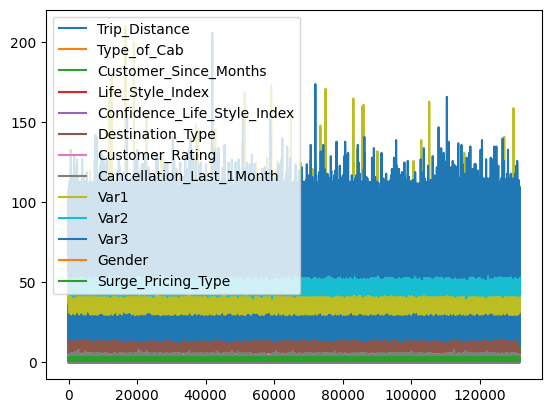

In [90]:
train.plot()

<Axes: xlabel='Surge_Pricing_Type'>

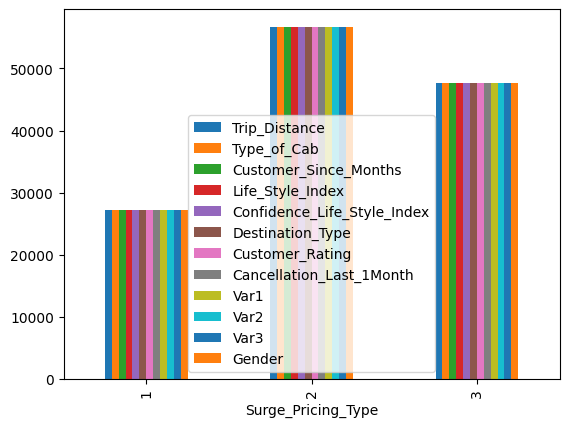

In [91]:
train.groupby('Surge_Pricing_Type').count().plot(kind='bar')

## Histogram

array([[<Axes: title={'center': 'Trip_Distance'}>,
        <Axes: title={'center': 'Type_of_Cab'}>,
        <Axes: title={'center': 'Customer_Since_Months'}>,
        <Axes: title={'center': 'Life_Style_Index'}>],
       [<Axes: title={'center': 'Confidence_Life_Style_Index'}>,
        <Axes: title={'center': 'Destination_Type'}>,
        <Axes: title={'center': 'Customer_Rating'}>,
        <Axes: title={'center': 'Cancellation_Last_1Month'}>],
       [<Axes: title={'center': 'Var1'}>,
        <Axes: title={'center': 'Var2'}>,
        <Axes: title={'center': 'Var3'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Surge_Pricing_Type'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

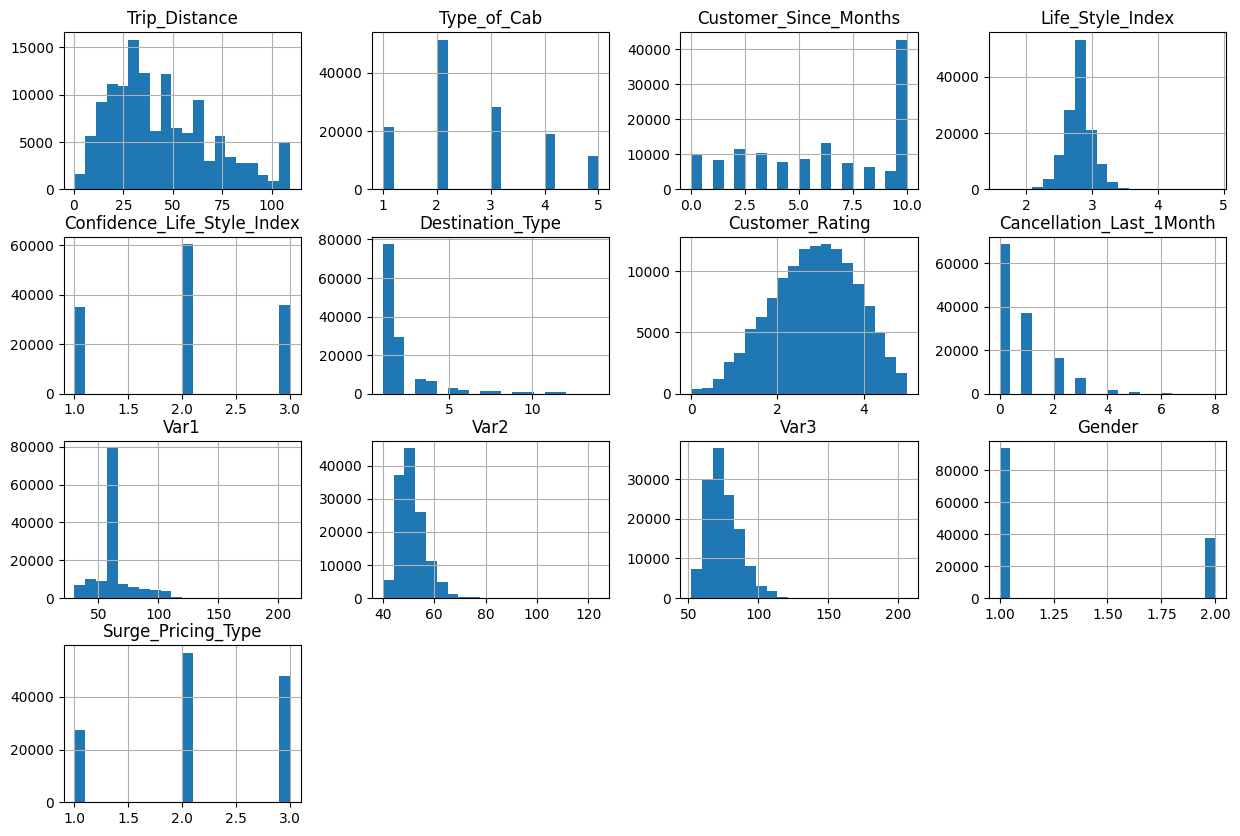

In [92]:
train.hist(bins = 20, figsize = (15, 10))

In [93]:
#sns.pairplot(train, hue = 'Surge_Pricing_Type')

# Deepdive EDA

## 1. Distribution Numeric Feature

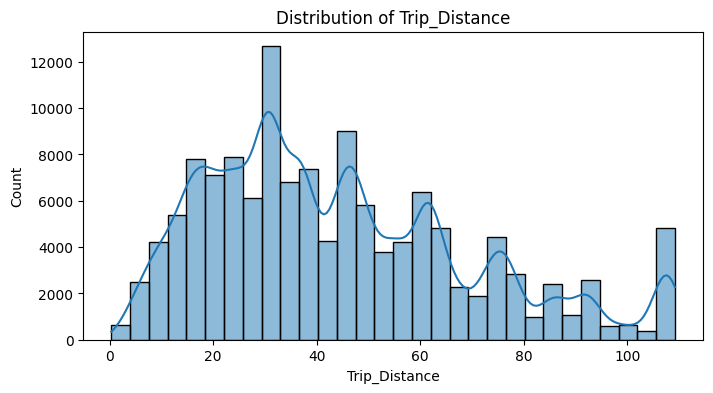

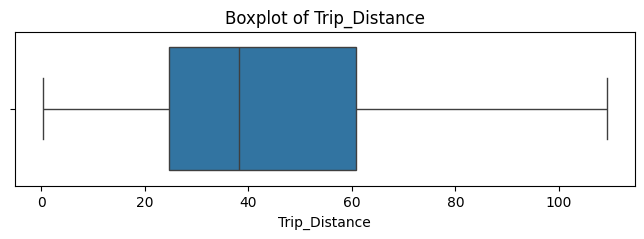

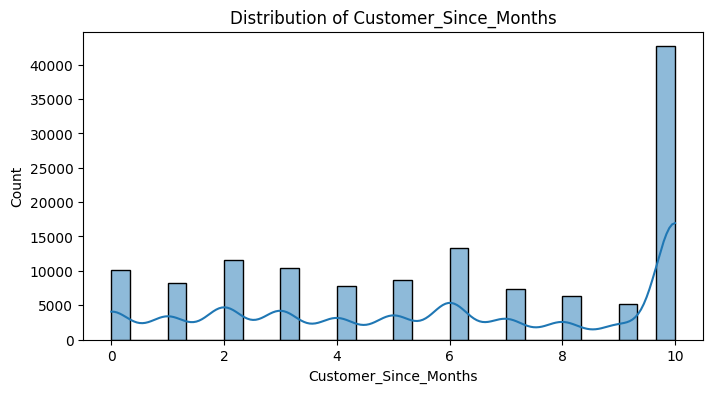

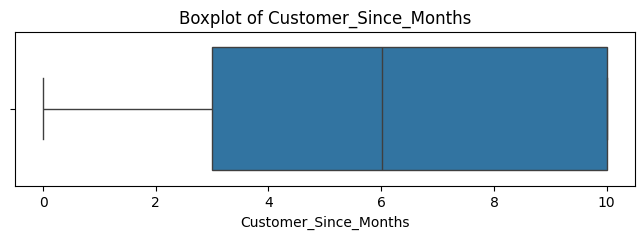

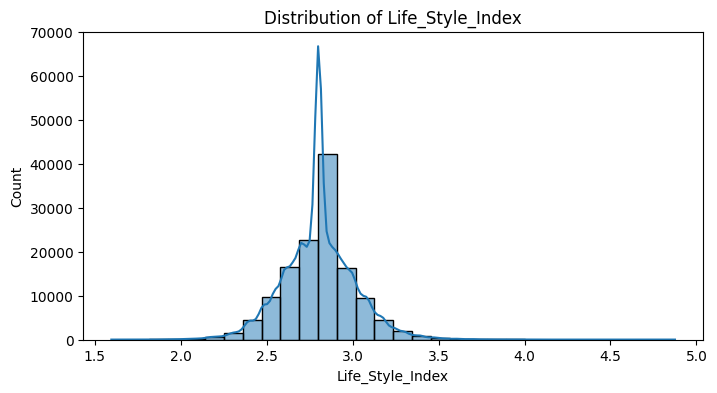

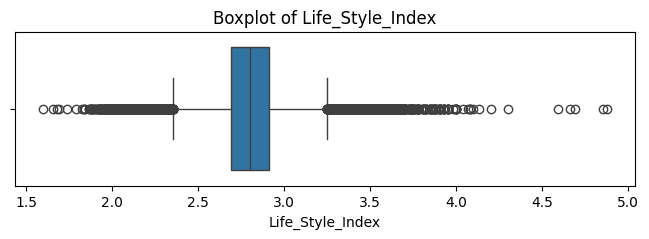

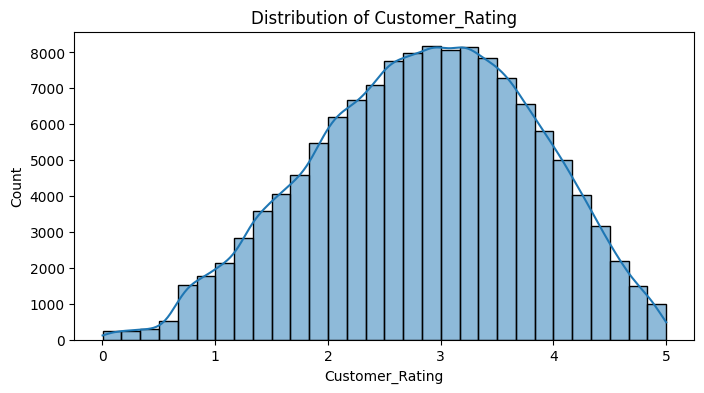

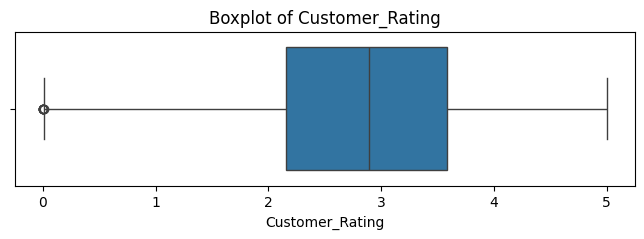

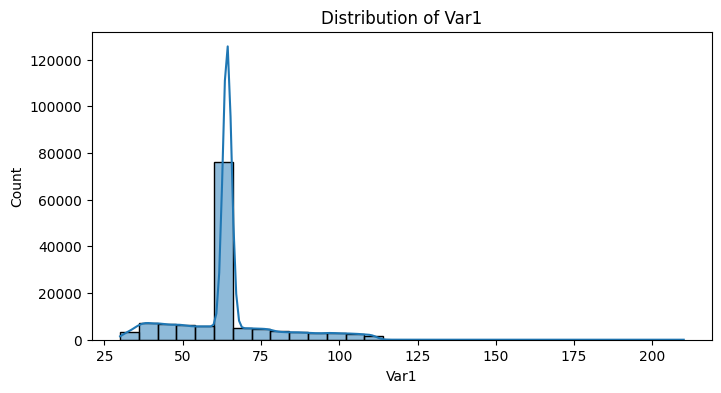

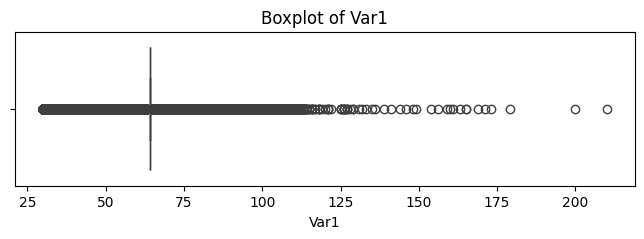

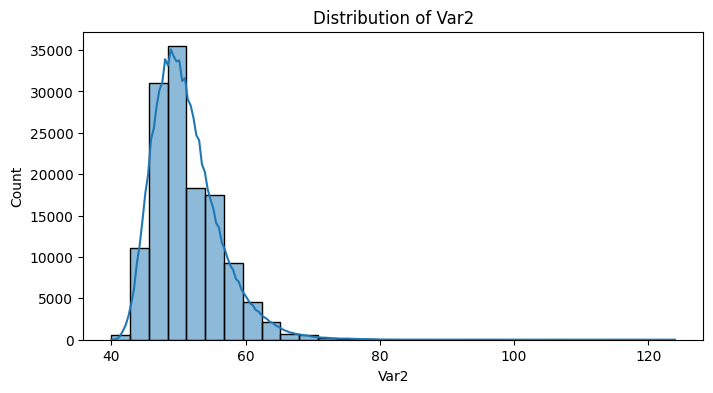

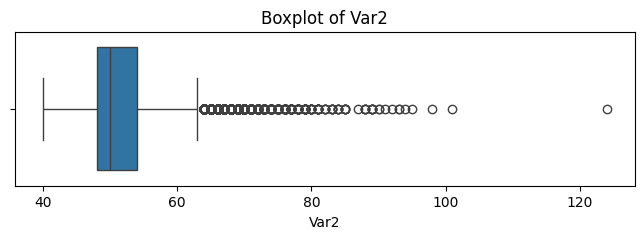

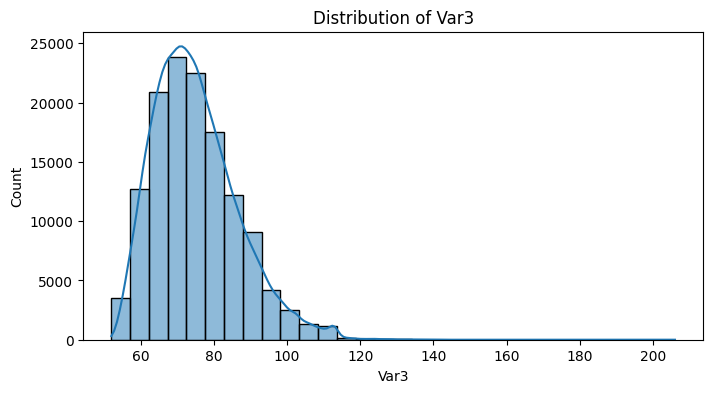

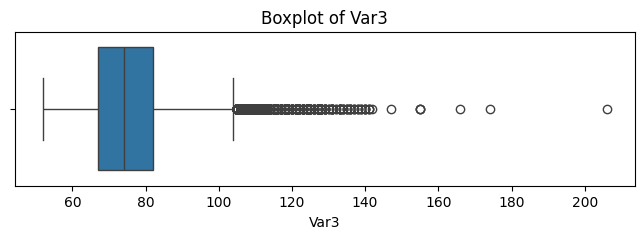

In [94]:
# Tampilkan distribusi dan boxplot untuk setiap fitur numerik
# (Lakukan deteksi outlier dan lihat sebaran data)
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating', 'Var1', 'Var2', 'Var3']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(8, 2))
    sns.boxplot(data=train, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


## 2. Distribution Categorical Feature 

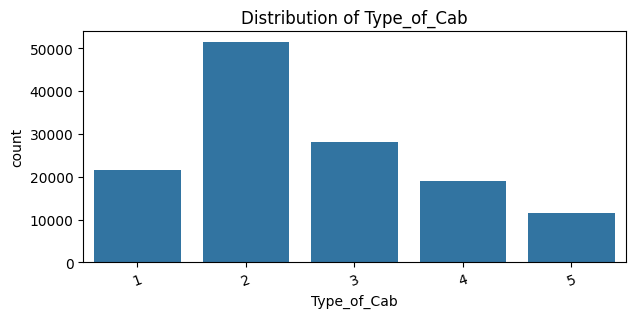

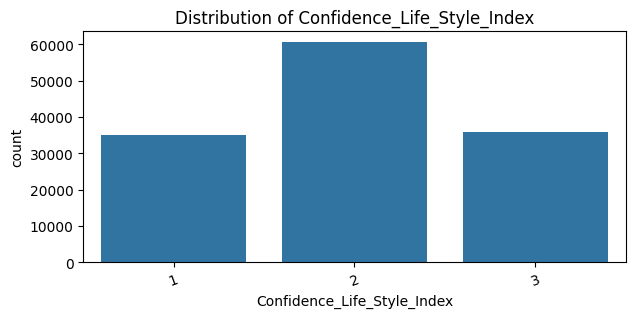

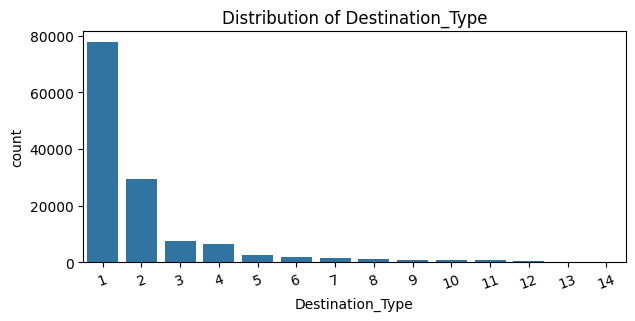

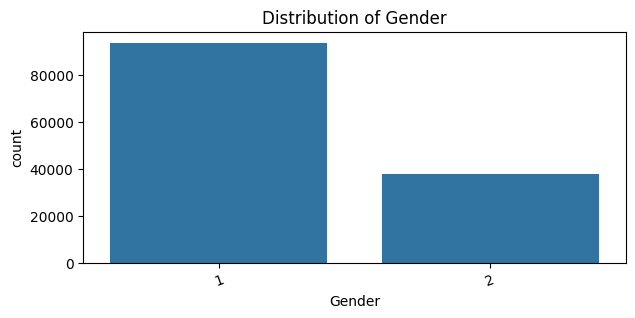

In [95]:
# Visualisasikan distribusi data untuk setiap fitur kategorikal di dataframe train
cat_cols = ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

for col in cat_cols:
    plt.figure(figsize=(7, 3))
    sns.countplot(data=train, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=20)
    plt.show()

## 3 Target Distribution

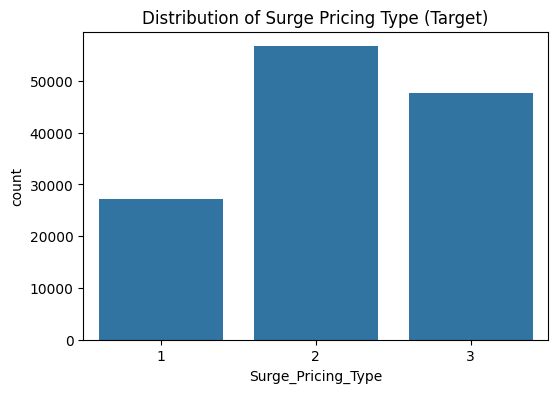

In [96]:
# Tampilkan distribusi kelas pada target untuk melihat balance data
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Surge_Pricing_Type')
plt.title("Distribution of Surge Pricing Type (Target)")
plt.show()

## 4. Relation Numeric Feature to Target (Boxplot)

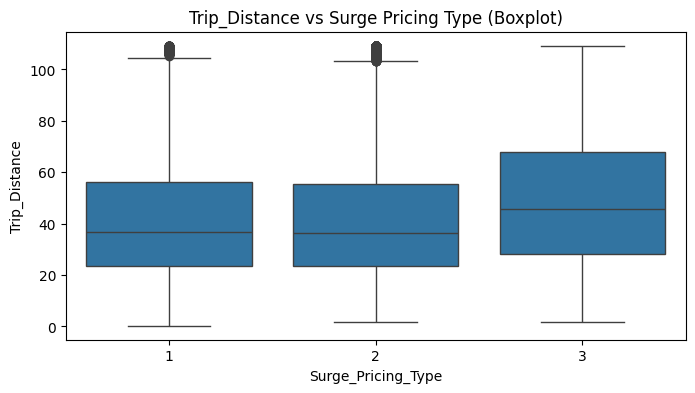

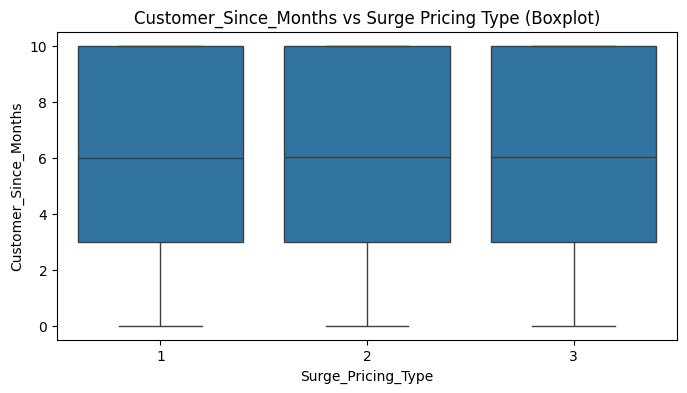

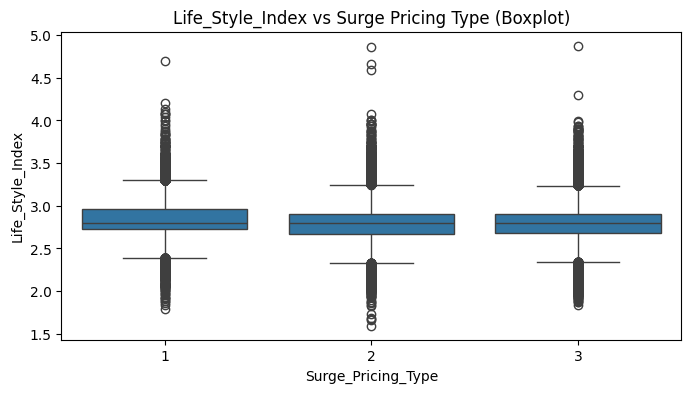

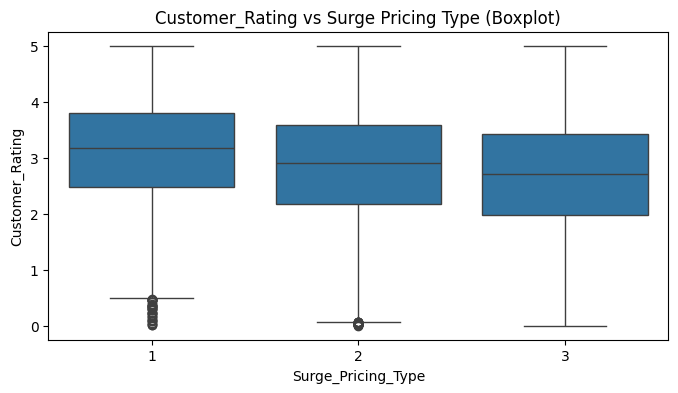

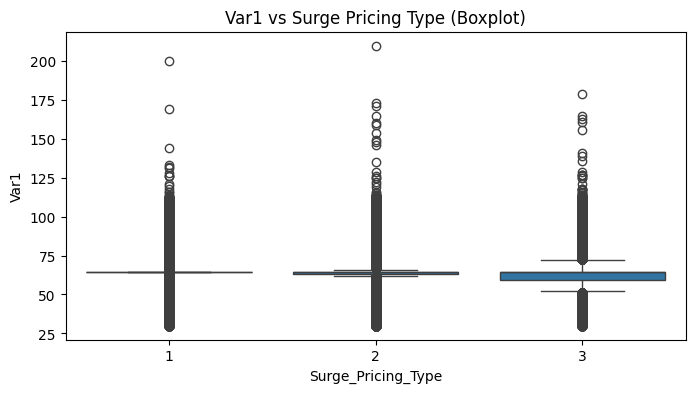

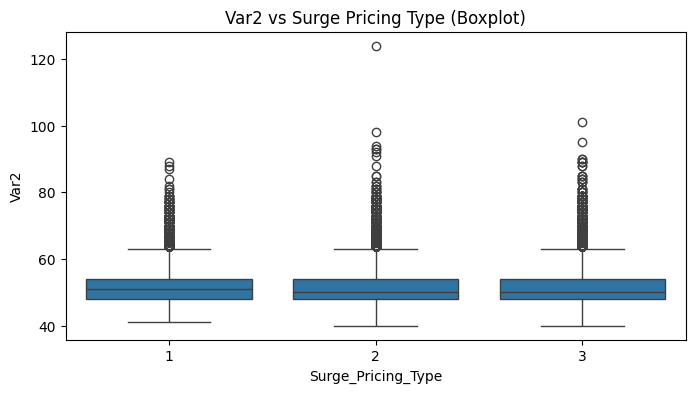

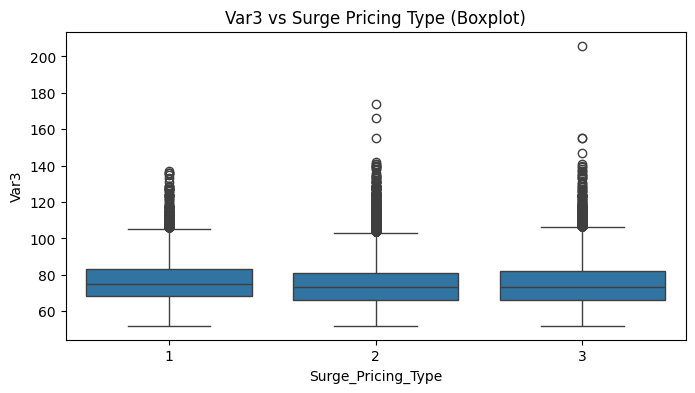

In [97]:
# Bandingkan nilai numerik terhadap kelas target menggunakan boxplot di train
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train, x='Surge_Pricing_Type', y=col)
    plt.title(f"{col} vs Surge Pricing Type (Boxplot)")
    plt.show()

## 5. Relation Numeric Feature to Target (Violinplot)

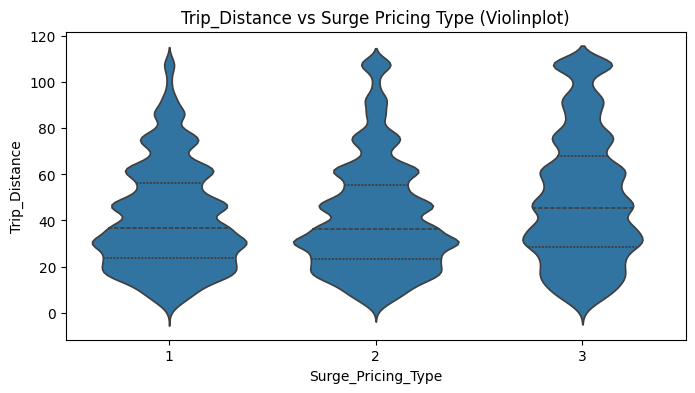

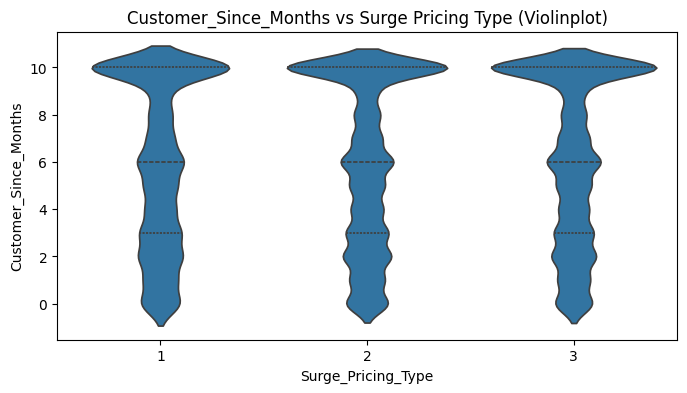

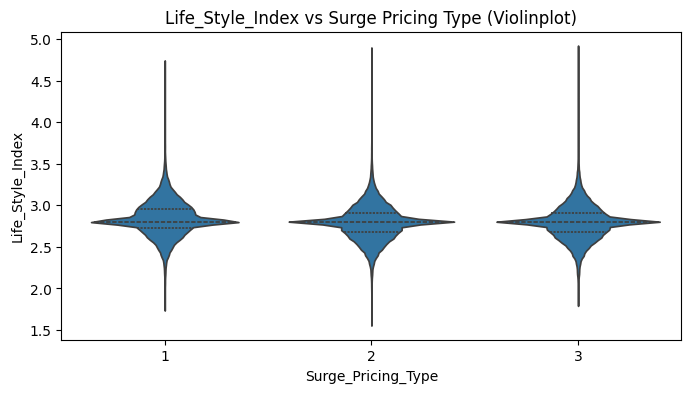

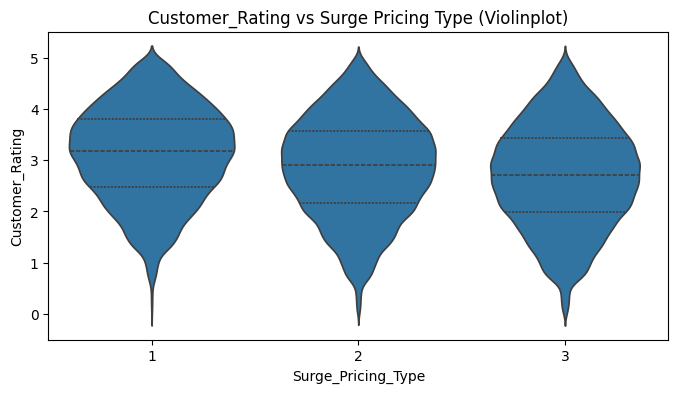

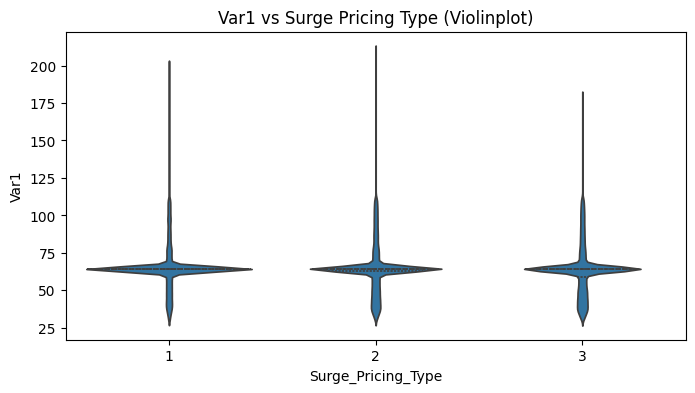

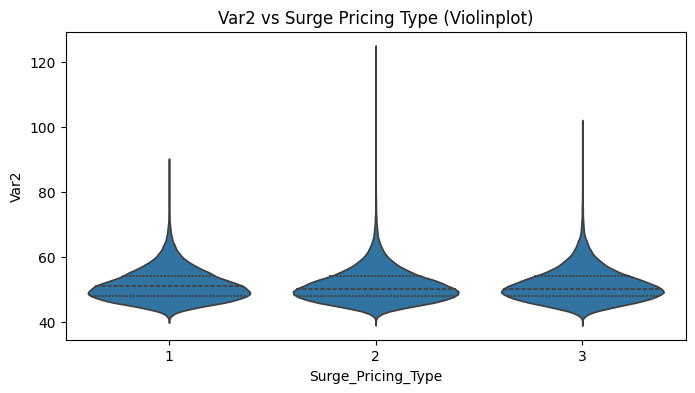

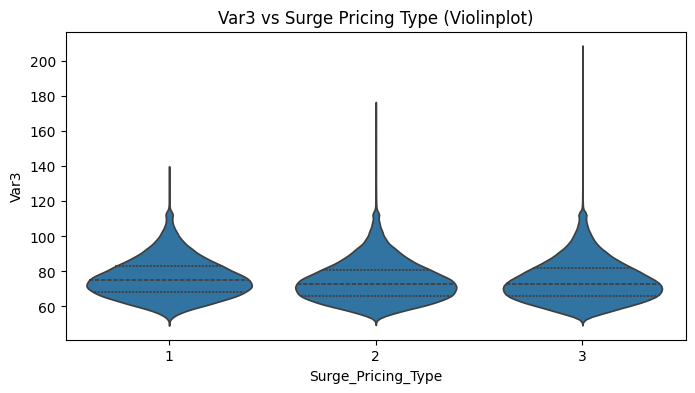

In [98]:
# Tambahkan violinplot untuk memperlihatkan distribusi per kelas target
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=train, x='Surge_Pricing_Type', y=col, inner='quartile')
    plt.title(f"{col} vs Surge Pricing Type (Violinplot)")
    plt.show()

## 6. Relasi Fitur Kategorikal ke Target

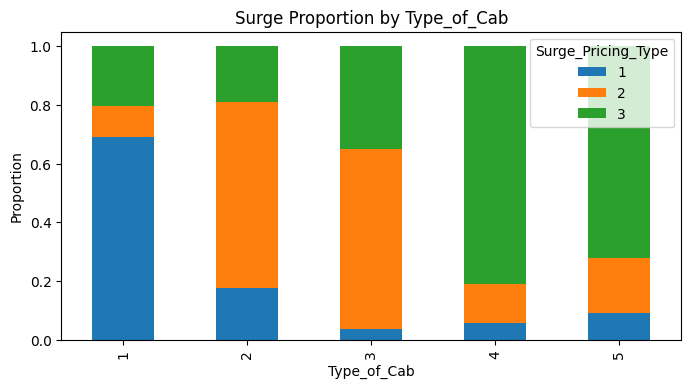

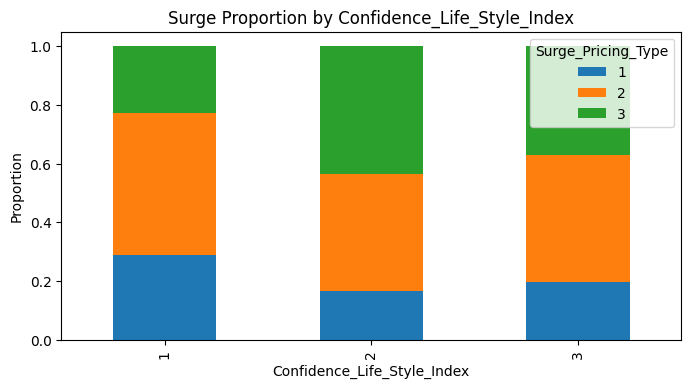

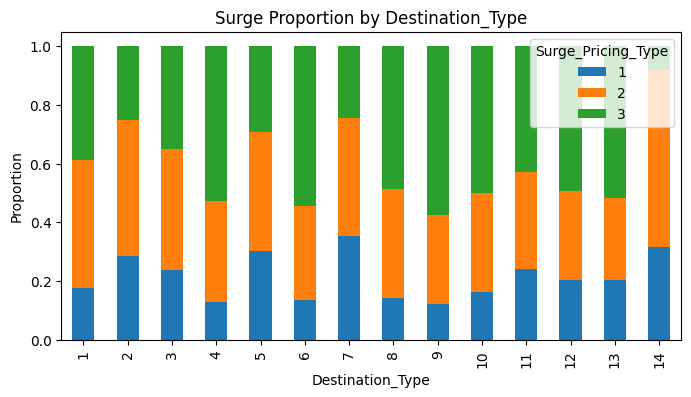

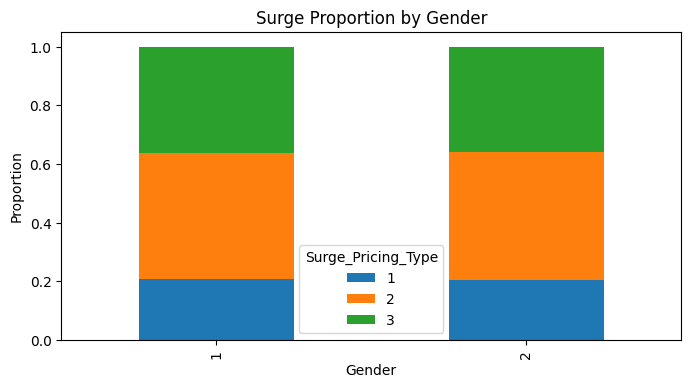

In [99]:
# Cek proporsi setiap surge di tiap kategori (stacked bar) di train
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    prop_df = pd.crosstab(train[col], train['Surge_Pricing_Type'], normalize='index')
    prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f"Surge Proportion by {col}")
    plt.ylabel("Proportion")
    plt.show()


## 7. Outlier Analyst

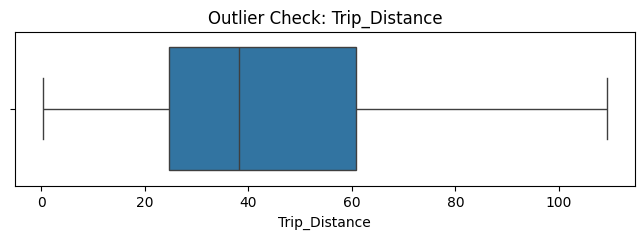

count    131662.000000
mean         44.200909
std          25.522882
min           0.310000
25%          24.580000
50%          38.200000
75%          60.730000
max         109.230000
Name: Trip_Distance, dtype: float64


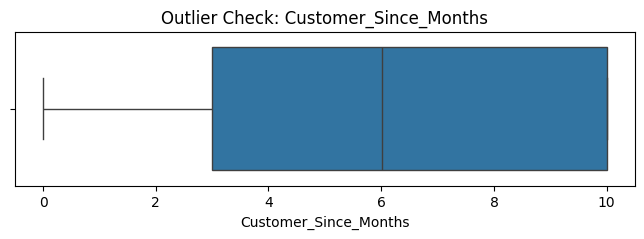

count    131662.000000
mean          6.016661
std           3.544410
min           0.000000
25%           3.000000
50%           6.016661
75%          10.000000
max          10.000000
Name: Customer_Since_Months, dtype: float64


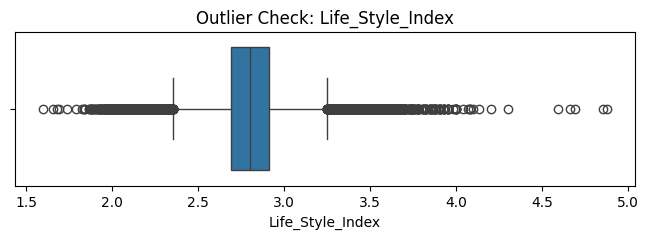

count    131662.000000
mean          2.802064
std           0.207760
min           1.596380
25%           2.687952
50%           2.802064
75%           2.912815
max           4.875110
Name: Life_Style_Index, dtype: float64


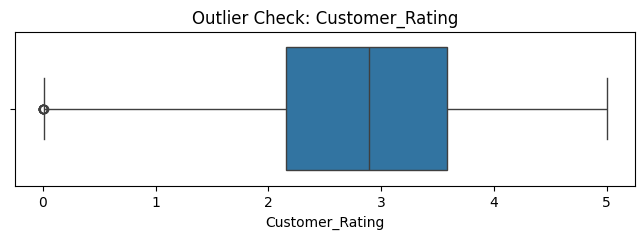

count    131662.000000
mean          2.849458
std           0.980675
min           0.001250
25%           2.152500
50%           2.895000
75%           3.582500
max           5.000000
Name: Customer_Rating, dtype: float64


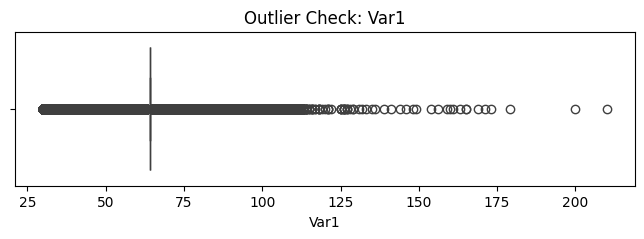

count    131662.000000
mean         64.202698
std          14.807523
min          30.000000
25%          64.000000
50%          64.202698
75%          64.202698
max         210.000000
Name: Var1, dtype: float64


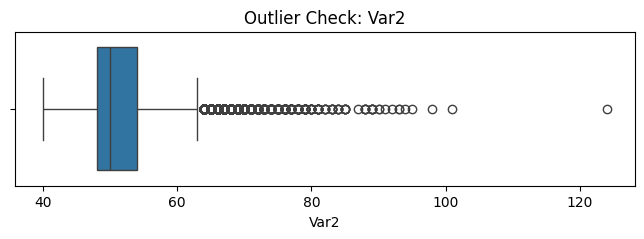

count    131662.000000
mean         51.202800
std           4.986142
min          40.000000
25%          48.000000
50%          50.000000
75%          54.000000
max         124.000000
Name: Var2, dtype: float64


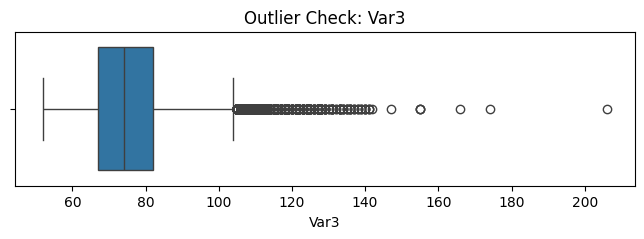

count    131662.000000
mean         75.099019
std          11.578278
min          52.000000
25%          67.000000
50%          74.000000
75%          82.000000
max         206.000000
Name: Var3, dtype: float64


In [100]:
# Deteksi outlier dengan boxplot dan statistik deskriptif di train
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=train[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()
    print(train[col].describe())

 ## 8. Statistik Mean/Median Numerik per Target

In [101]:
# Hitung rata-rata tiap fitur numerik di masing-masing kelas surge di train
for col in num_cols:
    mean_per_class = train.groupby('Surge_Pricing_Type')[col].mean()
    print(f"Mean {col} per Surge Pricing Type:\n{mean_per_class}\n")

Mean Trip_Distance per Surge Pricing Type:
Surge_Pricing_Type
1    41.061633
2    41.269265
3    49.476234
Name: Trip_Distance, dtype: float64

Mean Customer_Since_Months per Surge Pricing Type:
Surge_Pricing_Type
1    5.903252
2    5.960290
3    6.148349
Name: Customer_Since_Months, dtype: float64

Mean Life_Style_Index per Surge Pricing Type:
Surge_Pricing_Type
1    2.840574
2    2.791342
3    2.792849
Name: Life_Style_Index, dtype: float64

Mean Customer_Rating per Surge Pricing Type:
Surge_Pricing_Type
1    3.112791
2    2.857688
3    2.689500
Name: Customer_Rating, dtype: float64

Mean Var1 per Surge Pricing Type:
Surge_Pricing_Type
1    64.828299
2    64.269712
3    63.766263
Name: Var1, dtype: float64

Mean Var2 per Surge Pricing Type:
Surge_Pricing_Type
1    51.316785
2    51.064078
3    51.302703
Name: Var2, dtype: float64

Mean Var3 per Surge Pricing Type:
Surge_Pricing_Type
1    76.252223
2    74.772299
3    74.829757
Name: Var3, dtype: float64



##  9. Statistik Mean/Median Numerik per Target

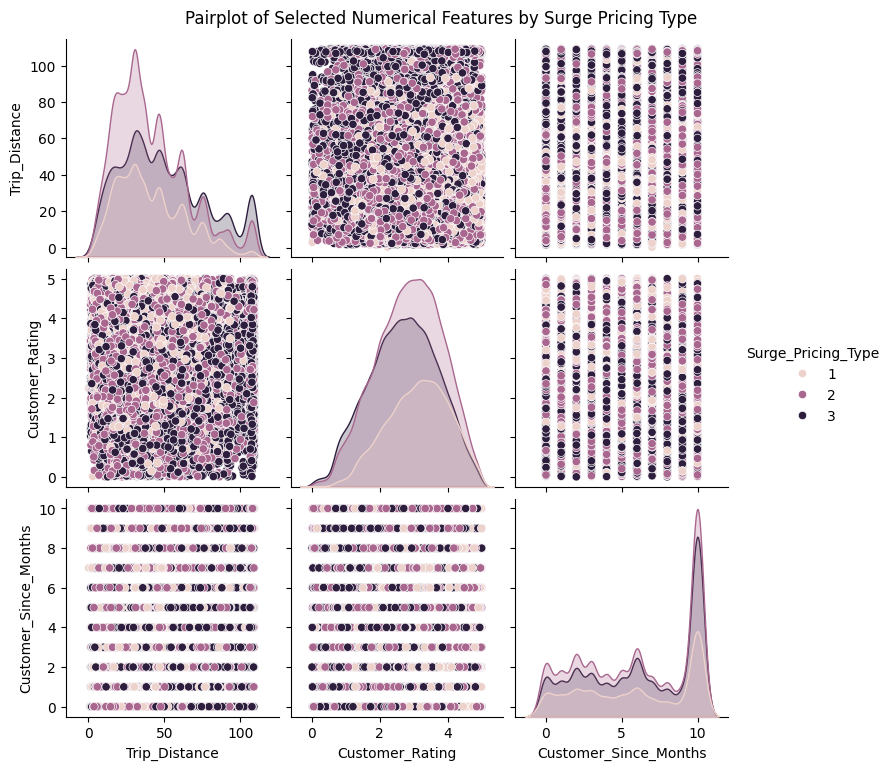

In [102]:
# Buat pairplot untuk visualisasi multivariat antar fitur numerik utama dan target di train
sns.pairplot(train, vars=['Trip_Distance', 'Customer_Rating', 'Customer_Since_Months'], hue='Surge_Pricing_Type', diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Features by Surge Pricing Type', y=1.02)
plt.show()

## 10. 2D Scatter untuk Pola Gabungan

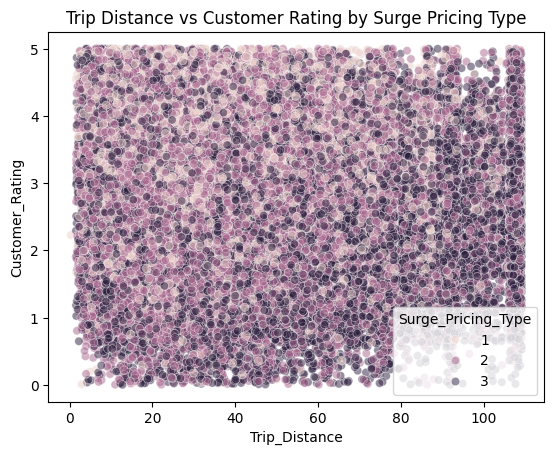

In [103]:
# Visualisasi scatter 2D antar dua fitur numerik utama terhadap kelas target di train
sns.scatterplot(data=train, x='Trip_Distance', y='Customer_Rating', hue='Surge_Pricing_Type', alpha=0.5)
plt.title('Trip Distance vs Customer Rating by Surge Pricing Type')
plt.show()

# Feature Engineering

## 1. Encoding categorical 

In [104]:
# Label encoding untuk fitur ordinal, one-hot encoding untuk fitur nominal

from sklearn.preprocessing import LabelEncoder

# Misal Confidence_Life_Style_Index & Gender itu ordinal, kita label encoding saja
le = LabelEncoder()
train['Confidence_Life_Style_Index'] = le.fit_transform(train['Confidence_Life_Style_Index'])
train['Gender'] = le.fit_transform(train['Gender'])

# Untuk Type_of_Cab dan Destination_Type, gunakan One Hot Encoding (karena ini nominal/multiclass)
train = pd.get_dummies(train, columns=['Type_of_Cab', 'Destination_Type'], drop_first=True)


## 2. Feature Scaling (Optional but recomended for some model like a SVM/NN)

In [105]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index', 'Customer_Rating', 'Var1', 'Var2', 'Var3']

scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])

## 3. New (Feature Creation)

In [106]:
# Contoh: bikin fitur 'Distance_per_Month' = Trip_Distance / (Customer_Since_Months + 1) 
train['Distance_per_Month'] = train['Trip_Distance'] / (train['Customer_Since_Months'] + 1)

# Bisa juga: Trip_Distance x Customer_Rating (asumsi pengaruh jarak & rating)
train['Distance_x_Rating'] = train['Trip_Distance'] * train['Customer_Rating']

## 4. Multicolinieritas (Optional)

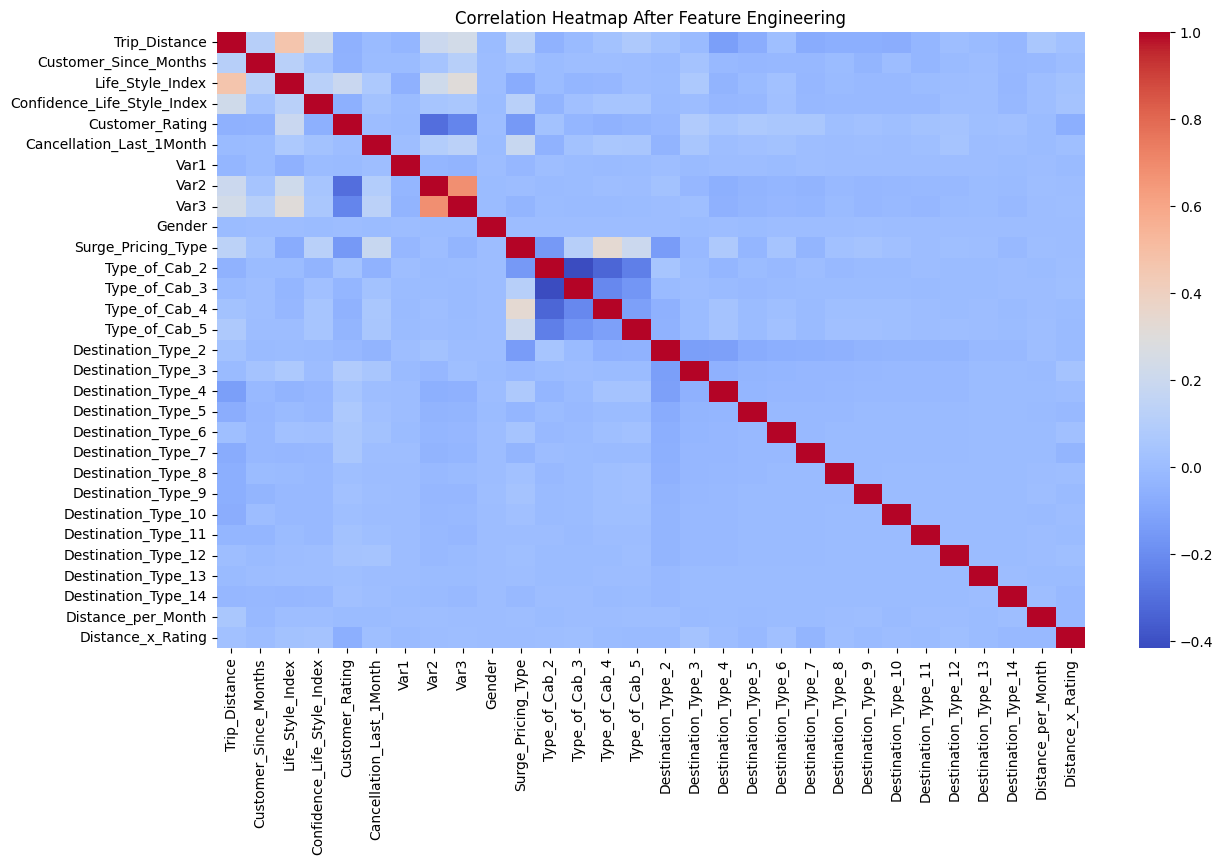

In [107]:
# Cek korelasi antar fitur baru & existing
corr = train.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap After Feature Engineering")
plt.show()

# 5. Get ready for X (feature) & y (target) for Modeling

In [108]:
# Target/Label
y = train['Surge_Pricing_Type']
# Semua kolom selain target jadi fitur
X = train.drop('Surge_Pricing_Type', axis=1)

# Baseline Model Building

## 1. Split Data (Train/Test)


In [109]:
# Split data menjadi train dan test set (pastikan stratify di target biar proporsional)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Model Building

    --> Decision Tree
    --> Logistic Regression
    --> Random Forest
    --> KNN
    --> Naive Bayes
    --> XGB
    --> LGBM

## Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Decision Tree - Train Acc: 1.000 | Test Acc: 0.558 | Gap: 0.442
              precision    recall  f1-score   support

           1       0.50      0.51      0.50      5443
           2       0.58      0.57      0.57     11346
           3       0.58      0.57      0.57      9544

    accuracy                           0.56     26333
   macro avg       0.55      0.55      0.55     26333
weighted avg       0.56      0.56      0.56     26333



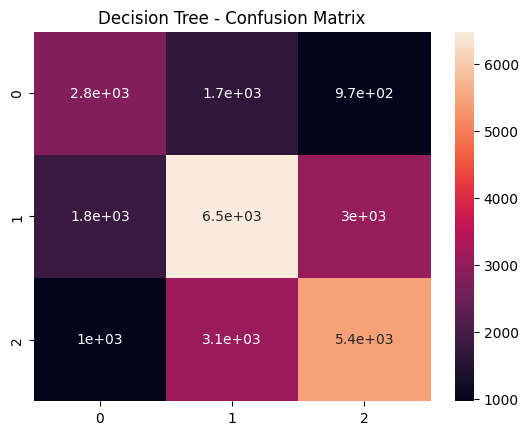

In [111]:
# Predict train & test
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt  = dt.predict(X_test)

# Akurasi & gap
acc_train_dt = accuracy_score(y_train, y_pred_train_dt)
acc_test_dt  = accuracy_score(y_test,  y_pred_test_dt)
gap_dt = acc_train_dt - acc_test_dt

print(f"Decision Tree - Train Acc: {acc_train_dt:.3f} | Test Acc: {acc_test_dt:.3f} | Gap: {gap_dt:.3f}")
print(classification_report(y_test, y_pred_test_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_test_dt), annot=True)
plt.title("Decision Tree - Confusion Matrix")
plt.show()


## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=200)
lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


Logistic Regression - Train Acc: 0.678 | Test Acc: 0.679 | Gap: -0.000
              precision    recall  f1-score   support

           1       0.74      0.53      0.62      5443
           2       0.63      0.83      0.72     11346
           3       0.73      0.59      0.65      9544

    accuracy                           0.68     26333
   macro avg       0.70      0.65      0.66     26333
weighted avg       0.69      0.68      0.67     26333



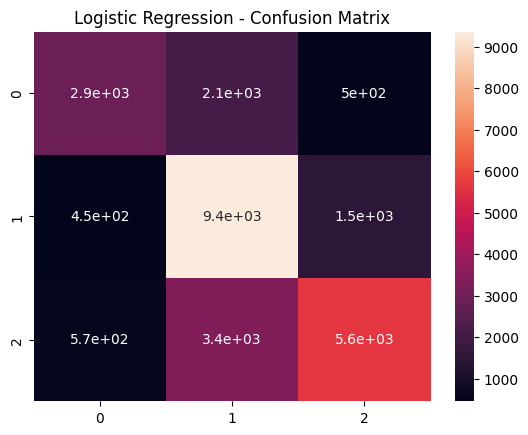

In [113]:
# Predict train & test
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr  = lr.predict(X_test)

# Akurasi & gap
acc_train_lr = accuracy_score(y_train, y_pred_train_lr)
acc_test_lr  = accuracy_score(y_test,  y_pred_test_lr)
gap_lr = acc_train_lr - acc_test_lr

print(f"Logistic Regression - Train Acc: {acc_train_lr:.3f} | Test Acc: {acc_test_lr:.3f} | Gap: {gap_lr:.3f}")
print(classification_report(y_test, y_pred_test_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_test_lr), annot=True)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


## Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Random Forest - Train Acc: 1.000 | Test Acc: 0.683 | Gap: 0.317
              precision    recall  f1-score   support

           1       0.76      0.53      0.62      5443
           2       0.64      0.82      0.72     11346
           3       0.73      0.61      0.67      9544

    accuracy                           0.68     26333
   macro avg       0.71      0.65      0.67     26333
weighted avg       0.70      0.68      0.68     26333



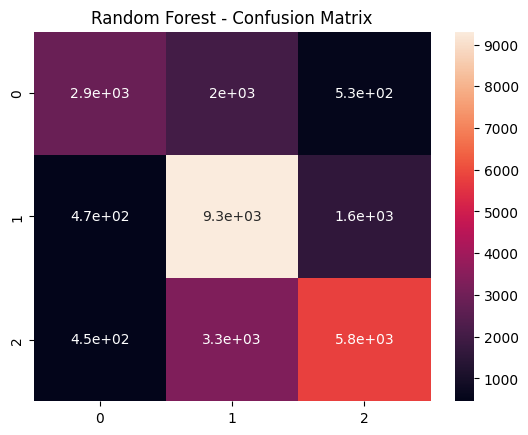

In [115]:
# Predict train & test
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf  = rf.predict(X_test)

# Akurasi & gap
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
acc_test_rf  = accuracy_score(y_test,  y_pred_test_rf)
gap_rf = acc_train_rf - acc_test_rf

print(f"Random Forest - Train Acc: {acc_train_rf:.3f} | Test Acc: {acc_test_rf:.3f} | Gap: {gap_rf:.3f}")
print(classification_report(y_test, y_pred_test_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True)
plt.title("Random Forest - Confusion Matrix")
plt.show()

## KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


KNN - Train Acc: 0.721 | Test Acc: 0.597 | Gap: 0.125
              precision    recall  f1-score   support

           1       0.50      0.53      0.51      5443
           2       0.59      0.69      0.64     11346
           3       0.68      0.53      0.59      9544

    accuracy                           0.60     26333
   macro avg       0.59      0.58      0.58     26333
weighted avg       0.60      0.60      0.60     26333



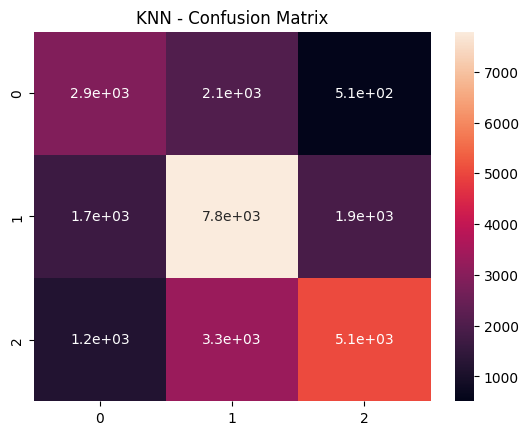

In [117]:
# Predict train & test
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn  = knn.predict(X_test)

# Akurasi & gap
acc_train_knn = accuracy_score(y_train, y_pred_train_knn)
acc_test_knn  = accuracy_score(y_test,  y_pred_test_knn)
gap_knn = acc_train_knn - acc_test_knn

print(f"KNN - Train Acc: {acc_train_knn:.3f} | Test Acc: {acc_test_knn:.3f} | Gap: {gap_knn:.3f}")
print(classification_report(y_test, y_pred_test_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_test_knn), annot=True)
plt.title("KNN - Confusion Matrix")
plt.show()

## Naive Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


Naive Bayes - Train Acc: 0.624 | Test Acc: 0.618 | Gap: 0.006
              precision    recall  f1-score   support

           1       0.61      0.44      0.51      5443
           2       0.59      0.75      0.66     11346
           3       0.68      0.56      0.62      9544

    accuracy                           0.62     26333
   macro avg       0.62      0.58      0.59     26333
weighted avg       0.63      0.62      0.61     26333



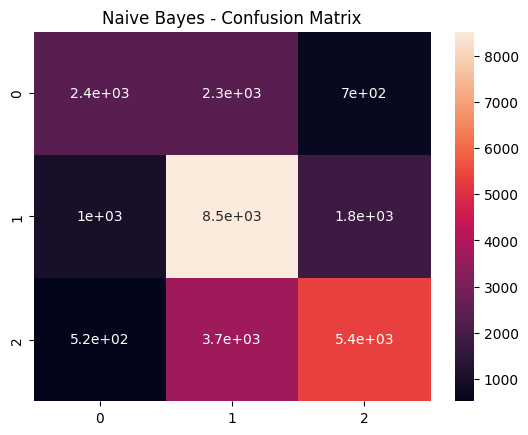

In [119]:
# Predict train & test
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb  = nb.predict(X_test)

# Akurasi & gap
acc_train_nb = accuracy_score(y_train, y_pred_train_nb)
acc_test_nb  = accuracy_score(y_test,  y_pred_test_nb)
gap_nb = acc_train_nb - acc_test_nb

print(f"Naive Bayes - Train Acc: {acc_train_nb:.3f} | Test Acc: {acc_test_nb:.3f} | Gap: {gap_nb:.3f}")
print(classification_report(y_test, y_pred_test_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_test_nb), annot=True)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

## XGB Boost

### care about error 

In [120]:
df = pd.read_csv('D:/polytron jaya/Coding/taxi-pricing-analysis/Dataset/sigma_cabs.csv')

# Handle missing values sesuai strategi yang sudah kamu lakukan
df['Type_of_Cab'] = df['Type_of_Cab'].fillna(df['Type_of_Cab'].mode()[0])
df['Customer_Since_Months'] = df['Customer_Since_Months'].fillna(df['Customer_Since_Months'].mean())
df['Life_Style_Index'] = df['Life_Style_Index'].fillna(df['Life_Style_Index'].mean())
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].fillna(df['Confidence_Life_Style_Index'].mode()[0])
df['Var1'] = df['Var1'].fillna(df['Var1'].mean())
df = df.drop(['Trip_ID'], axis=1)

In [121]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [122]:
# Ganti 'Surge_Pricing_Type' dengan nama kolom target aslinya jika beda
Xgb = df.drop('Surge_Pricing_Type', axis=1)
ygb = df['Surge_Pricing_Type']

In [123]:
legb = LabelEncoder()
ygb_encoded = legb.fit_transform(y)

In [124]:
Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(
    Xgb, ygb_encoded, test_size=0.2, random_state=42, stratify=ygb_encoded
)

###XGB Fix no error

d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:18:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Train Acc: 0.729 | Test Acc: 0.690 | Gap: 0.039
              precision    recall  f1-score   support

           0       0.77      0.54      0.63      5443
           1       0.64      0.82      0.72     11346
           2       0.74      0.62      0.68      9544

    accuracy                           0.69     26333
   macro avg       0.72      0.66      0.68     26333
weighted avg       0.70      0.69      0.69     26333



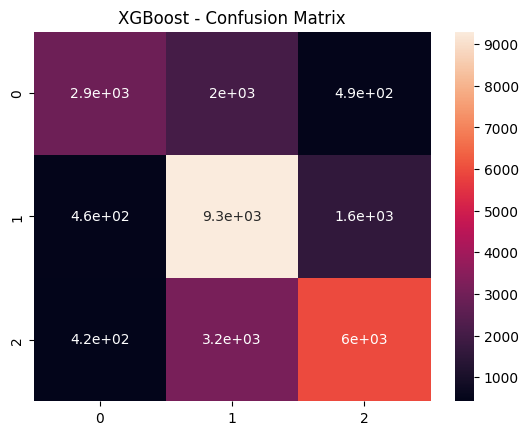

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(Xgb_train, ygb_train)

y_pred_train_xgb = xgb.predict(Xgb_train)
y_pred_test_xgb  = xgb.predict(Xgb_test)

acc_train_xgb = accuracy_score(ygb_train, y_pred_train_xgb)
acc_test_xgb  = accuracy_score(ygb_test,  y_pred_test_xgb)
gap_xgb = acc_train_xgb - acc_test_xgb

print(f"XGBoost - Train Acc: {acc_train_xgb:.3f} | Test Acc: {acc_test_xgb:.3f} | Gap: {gap_xgb:.3f}")
print(classification_report(ygb_test, y_pred_test_xgb))
sns.heatmap(confusion_matrix(ygb_test, y_pred_test_xgb), annot=True)
plt.title("XGBoost - Confusion Matrix")
plt.show()


## LGBM Classifier

In [126]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


LightGBM - Train Acc: 0.707 | Test Acc: 0.692 | Gap: 0.015
              precision    recall  f1-score   support

           1       0.77      0.53      0.63      5443
           2       0.64      0.83      0.72     11346
           3       0.75      0.62      0.68      9544

    accuracy                           0.69     26333
   macro avg       0.72      0.66      0.68     26333
weighted avg       0.71      0.69      0.69     26333



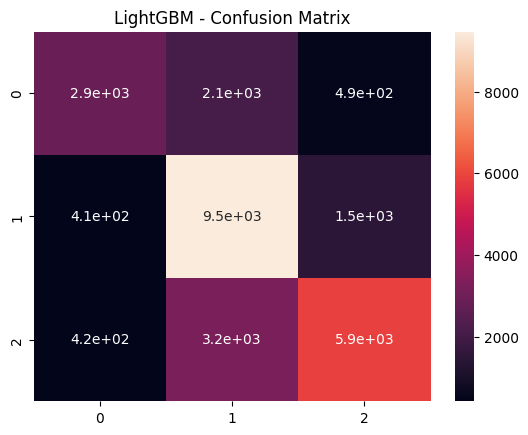

In [127]:
y_pred_train_lgbm = lgbm.predict(X_train)
y_pred_test_lgbm  = lgbm.predict(X_test)

acc_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)
acc_test_lgbm  = accuracy_score(y_test,  y_pred_test_lgbm)
gap_lgbm = acc_train_lgbm - acc_test_lgbm

print(f"LightGBM - Train Acc: {acc_train_lgbm:.3f} | Test Acc: {acc_test_lgbm:.3f} | Gap: {gap_lgbm:.3f}")
print(classification_report(y_test, y_pred_test_lgbm))
sns.heatmap(confusion_matrix(y_test, y_pred_test_lgbm), annot=True)
plt.title("LightGBM - Confusion Matrix")
plt.show()

## Recap All Baseline Model

In [128]:
import pandas as pd

models = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree", "XGBoost", "LightGBM"]
train_acc = [acc_train_lr, acc_train_knn, acc_train_nb, acc_train_dt, acc_train_xgb, acc_train_lgbm]
test_acc  = [acc_test_lr,  acc_test_knn,  acc_test_nb,  acc_test_dt,  acc_test_xgb,  acc_test_lgbm]
gap       = [gap_lr,       gap_knn,       gap_nb,       gap_dt,       gap_xgb,       gap_lgbm]

results = pd.DataFrame({
    "Model": models,
    "Train Acc": train_acc,
    "Test Acc": test_acc,
    "Gap": gap
})

print(results)

                 Model  Train Acc  Test Acc       Gap
0  Logistic Regression   0.678360  0.678654 -0.000294
1                  KNN   0.721435  0.596856  0.124579
2          Naive Bayes   0.623722  0.617704  0.006018
3        Decision Tree   1.000000  0.558425  0.441575
4              XGBoost   0.729182  0.690275  0.038907
5             LightGBM   0.707232  0.692325  0.014906


                 Model  Precision    Recall  F1-Score  Support
0        Decision Tree   0.558973  0.558425  0.558662  26333.0
1  Logistic Regression   0.692035  0.678654  0.673483  26333.0
2        Random Forest   0.696750  0.683021  0.678466  26333.0
3                  KNN   0.604513  0.596856  0.595840  26333.0
4          Naive Bayes   0.625015  0.617704  0.612100  26333.0
5              XGBoost   0.703967  0.690275  0.686306  26333.0
6             LightGBM   0.708268  0.692325  0.687593  26333.0


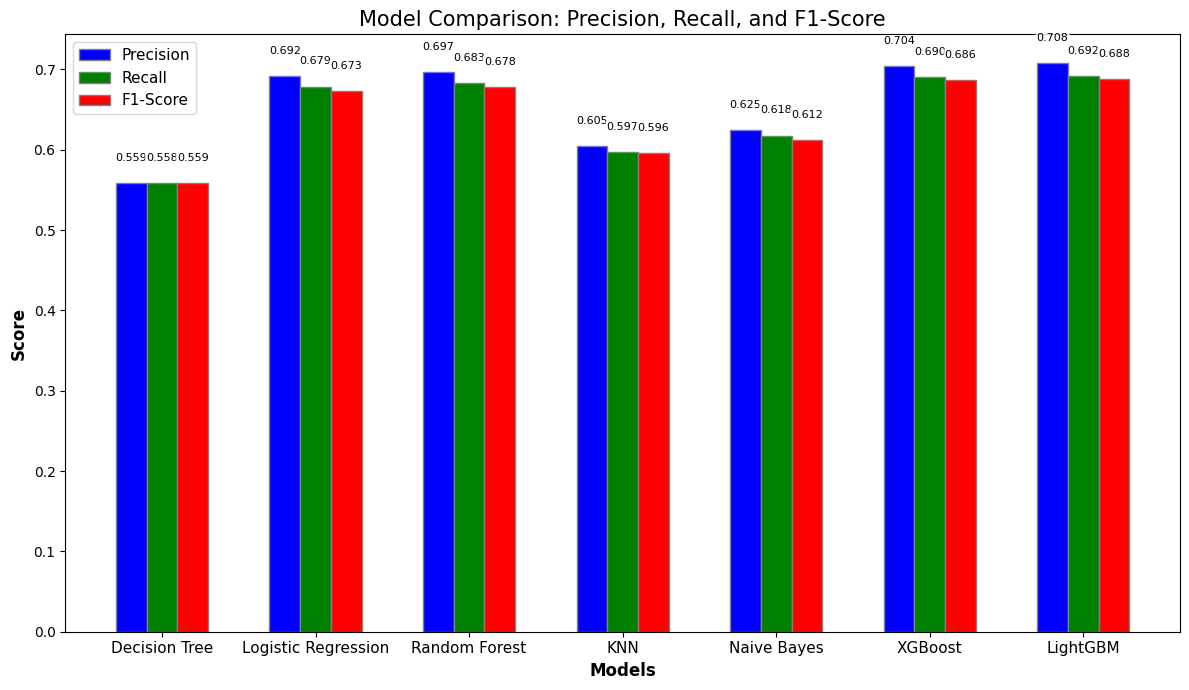

In [129]:
# === Ambil classification_report semua model ===
# Pastikan variabel prediksi di bawah sudah sesuai dengan hasil fit & predict-mu
# Perhatikan: semuanya pakai output_dict=True!
report_dt   = classification_report(y_test, y_pred_test_dt, output_dict=True)     # Decision Tree
report_lr   = classification_report(y_test, y_pred_test_lr, output_dict=True)     # Logistic Regression
report_rf   = classification_report(y_test, y_pred_test_rf, output_dict=True)     # Random Forest
report_knn  = classification_report(y_test, y_pred_test_knn, output_dict=True)    # KNN
report_nb   = classification_report(y_test, y_pred_test_nb, output_dict=True)     # Naive Bayes

# Untuk XGBoost, tetap gunakan variabel hasil split khusus XGB
report_xgb  = classification_report(ygb_test, y_pred_test_xgb, output_dict=True)
report_lgbm = classification_report(y_test, y_pred_test_lgbm, output_dict=True)

# === Buat tabel perbandingan performa ===
report_data = {
    'Model': [
        'Decision Tree', 
        'Logistic Regression', 
        'Random Forest', 
        'KNN', 
        'Naive Bayes', 
        'XGBoost', 
        'LightGBM'
    ],
    'Precision': [
        report_dt['weighted avg']['precision'],
        report_lr['weighted avg']['precision'],
        report_rf['weighted avg']['precision'],
        report_knn['weighted avg']['precision'],
        report_nb['weighted avg']['precision'],
        report_xgb['weighted avg']['precision'],
        report_lgbm['weighted avg']['precision'],
    ],
    'Recall': [
        report_dt['weighted avg']['recall'],
        report_lr['weighted avg']['recall'],
        report_rf['weighted avg']['recall'],
        report_knn['weighted avg']['recall'],
        report_nb['weighted avg']['recall'],
        report_xgb['weighted avg']['recall'],
        report_lgbm['weighted avg']['recall'],
    ],
    'F1-Score': [
        report_dt['weighted avg']['f1-score'],
        report_lr['weighted avg']['f1-score'],
        report_rf['weighted avg']['f1-score'],
        report_knn['weighted avg']['f1-score'],
        report_nb['weighted avg']['f1-score'],
        report_xgb['weighted avg']['f1-score'],
        report_lgbm['weighted avg']['f1-score'],
    ],
    'Support': [
        report_dt['weighted avg']['support'],
        report_lr['weighted avg']['support'],
        report_rf['weighted avg']['support'],
        report_knn['weighted avg']['support'],
        report_nb['weighted avg']['support'],
        report_xgb['weighted avg']['support'],
        report_lgbm['weighted avg']['support'],
    ]
}

comparison_df = pd.DataFrame(report_data)
print(comparison_df)

# === Visualisasi hasil (bar chart) ===
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.2
r1 = np.arange(len(comparison_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

bar1 = ax.bar(r1, comparison_df['Precision'], color='b', width=bar_width, edgecolor='grey', label='Precision')
bar2 = ax.bar(r2, comparison_df['Recall'], color='g', width=bar_width, edgecolor='grey', label='Recall')
bar3 = ax.bar(r3, comparison_df['F1-Score'], color='r', width=bar_width, edgecolor='grey', label='F1-Score')

ax.set_xlabel('Models', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Model Comparison: Precision, Recall, and F1-Score', fontsize=15)
ax.set_xticks([r + bar_width for r in range(len(comparison_df))])
ax.set_xticklabels(comparison_df['Model'], fontsize=11)
ax.legend(fontsize=11)

# Tampilkan angka aktual di atas bar dengan font kecil, background putih, dan sedikit rotasi
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 0.025,
            f'{bar.get_height():.3f}',
            ha='center', va='bottom',
            fontsize=8,
            color='black',
            rotation=0,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.1')
        )

plt.tight_layout()
plt.show()

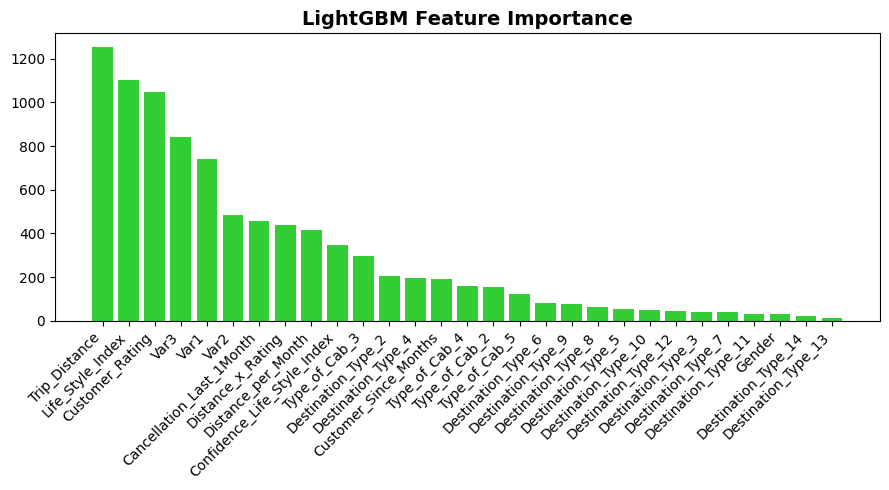

In [130]:
importances = lgbm.feature_importances_
feat_names = X_train.columns if hasattr(X_train, "columns") else [f"F{i}" for i in range(len(importances))]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(9, 5))
plt.bar(range(len(importances)), importances[indices], color='limegreen')
plt.xticks(range(len(importances)), np.array(feat_names)[indices], rotation=45, ha='right')
plt.title("LightGBM Feature Importance", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning for 2 best Found Model

## 1. LightGBM Hyperparameter Tuning with GridSeachCV

In [131]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# --- Siapkan X_train dan y_train sesuai hasil preprocessingmu ---

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 6, 8, -1],      # -1 = no limit
    'num_leaves': [15, 31, 63],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0, 1, 5]
}

lgbm = LGBMClassifier(random_state=42)
grid_lgbm = GridSearchCV(
    lgbm, 
    param_grid_lgbm, 
    cv=3, 
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1
)
grid_lgbm.fit(X_train, y_train)

print("Best LGBM Params:", grid_lgbm.best_params_)
print("Best LGBM CV Score:", grid_lgbm.best_score_)
best_lgbm = grid_lgbm.best_estimator_

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best LGBM Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31, 'reg_lambda': 5, 'subsample': 0.8}
Best LGBM CV Score: 0.6933038297405064


## 2. Gradient Boosting (XGB Scikit-learn) Hyperparameter Tuning with GridSeachCV

In [132]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0, 1, 5]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
grid_xgb = GridSearchCV(
    xgb, 
    param_grid_xgb, 
    cv=3, 
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1
)
grid_xgb.fit(Xgb_train, ygb_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB CV Score:", grid_xgb.best_score_)
best_xgb = grid_xgb.best_estimator_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'reg_lambda': 5, 'subsample': 0.8}
Best XGB CV Score: 0.6930664912738683


## Hyperparameter Tuning Performance

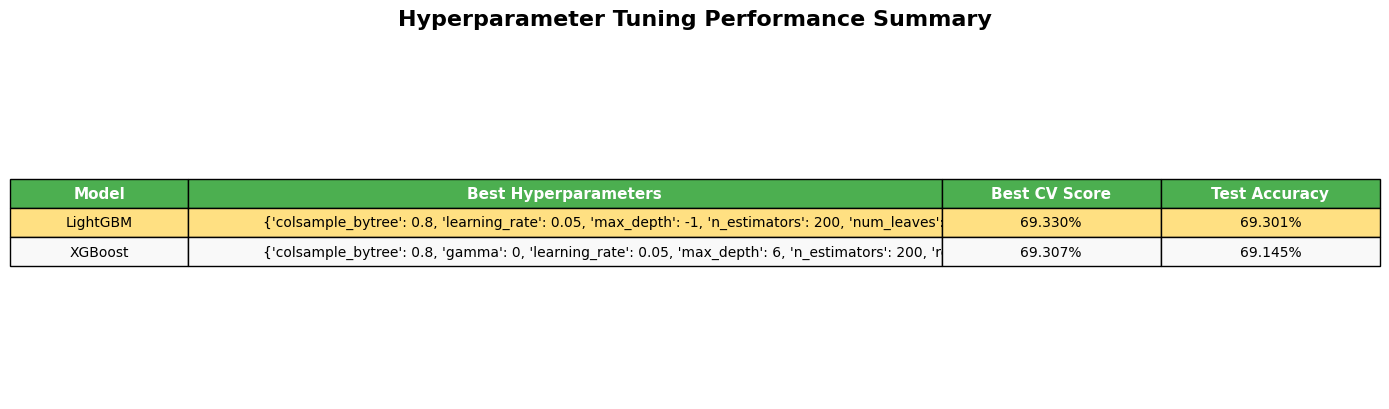

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh: Kumpulan hasil tuning semua model utama
results_data = [
    {
        'Model': 'LightGBM',
        'Best Hyperparameters': str(grid_lgbm.best_params_),
        'Best CV Score': grid_lgbm.best_score_,
        'Test Accuracy': best_lgbm.score(X_test, y_test)
    },
    {
        'Model': 'XGBoost',
        'Best Hyperparameters': str(grid_xgb.best_params_),
        'Best CV Score': grid_xgb.best_score_,
        'Test Accuracy': best_xgb.score(Xgb_test, ygb_test)
    }
]

# --- 2. DataFrame & Formatting
df = pd.DataFrame(results_data)
df = df.sort_values(by='Best CV Score', ascending=False).reset_index(drop=True)
df['Best CV Score'] = df['Best CV Score'].apply(lambda x: f"{x:.3%}")
df['Test Accuracy'] = df['Test Accuracy'].apply(lambda x: f"{x:.3%}" if pd.notna(x) else '-')

# --- 3. Visualisasi Matplotlib Table
fig, ax = plt.subplots(figsize=(14, 3 + 0.6 * len(df)))
ax.axis('off')

col_widths = [0.13, 0.55, 0.16, 0.16]  # Atur lebar kolom (proporsional jika tambah model)
mpl_table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    colWidths=col_widths,
    loc='center'
)

# Styling
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(10)
mpl_table.scale(1, 1.6)

# Header styling & highlight best score
best_cv_idx = df['Best CV Score'].astype(str).idxmax() + 1  # +1: header row
for (row, col), cell in mpl_table.get_celld().items():
    if row == 0:
        cell.set_fontsize(11)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4caf50')
    elif row == best_cv_idx:
        cell.set_facecolor('#ffe082')  # Highlight baris skor terbaik
    else:
        cell.set_facecolor('#f9f9f9' if row % 2 == 0 else 'white')
    if col == 1 and row != 0:
        cell.set_text_props(ha='left')  # Align left hyperparams

plt.title('Hyperparameter Tuning Performance Summary', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()



# K-Fold Cross Validation

## Getting The K-Fold Cross Validation Score

### Prepare Best model (based from best estimator)

In [134]:
#best estimator (LightGBM & XGBoost)
best_lgbm = grid_lgbm.best_estimator_
best_xgb = grid_xgb.best_estimator_

### Implementation KFoldCV

#### handling error

In [135]:
# Jika ygb adalah target asli: [1, 2, 3]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_xgb = le.fit_transform(ygb)  # hasil: 0, 1, 2

### Implementation

In [136]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Siapkan objek KFold (misal 5 fold, urut/acak, dan random_state supaya reproducible)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross Validation untuk LightGBM
cv_scores_lgbm = cross_val_score(best_lgbm, X, y, cv=kf, scoring='accuracy')
print("LightGBM CV Scores:", np.round(cv_scores_lgbm, 4))
print("LightGBM Mean CV Accuracy:", np.mean(cv_scores_lgbm))

# Cross Validation untuk XGBoost
# Misal best_xgb sudah best_estimator hasil GridSearchCV, dan ygb adalah target asli (1,2,3)
y_xgb = ygb - 1

cv_scores_xgb = cross_val_score(best_xgb, Xgb, y_xgb, cv=kf, scoring='accuracy')
print("XGBoost CV Scores:", np.round(cv_scores_xgb, 4))
print("XGBoost Mean CV Accuracy:", np.mean(cv_scores_xgb))

LightGBM CV Scores: [0.6947 0.6922 0.6944 0.6932 0.6936]
LightGBM Mean CV Accuracy: 0.6936321819159316


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarni

XGBoost CV Scores: [0.6937 0.6922 0.6936 0.6928 0.6935]
XGBoost Mean CV Accuracy: 0.6931536850397333


## Making Table

In [137]:
import pandas as pd
import numpy as np

# Misal hasil cross_val_score sudah diperoleh
# cv_scores_lgbm = ...
# cv_scores_xgb  = ...

# Buat DataFrame hasil
cv_result = pd.DataFrame({
    "Model": ["LightGBM"]*len(cv_scores_lgbm) + ["XGBoost"]*len(cv_scores_xgb),
    "Fold":  list(range(1, len(cv_scores_lgbm)+1)) + list(range(1, len(cv_scores_xgb)+1)),
    "Accuracy": np.concatenate([cv_scores_lgbm, cv_scores_xgb])
})

print("\n=== K-Fold CV Result Table ===")
print(cv_result)

# Ringkasan Mean CV
summary = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],
    "Mean CV Accuracy": [np.mean(cv_scores_lgbm), np.mean(cv_scores_xgb)]
})
print("\n=== Mean CV Accuracy Table ===")
print(summary)



=== K-Fold CV Result Table ===
      Model  Fold  Accuracy
0  LightGBM     1  0.694680
1  LightGBM     2  0.692249
2  LightGBM     3  0.694402
3  LightGBM     4  0.693225
4  LightGBM     5  0.693605
5   XGBoost     1  0.693654
6   XGBoost     2  0.692173
7   XGBoost     3  0.693643
8   XGBoost     4  0.692769
9   XGBoost     5  0.693529

=== Mean CV Accuracy Table ===
      Model  Mean CV Accuracy
0  LightGBM          0.693632
1   XGBoost          0.693154


In [138]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Siapkan objek KFold (misal 5 fold, urut/acak, dan random_state supaya reproducible)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross Validation untuk LightGBM
cv_scores_lgbm = cross_val_score(best_lgbm, X, y, cv=kf, scoring='accuracy')
print("LightGBM CV Scores:", np.round(cv_scores_lgbm, 4))
print("LightGBM Mean CV Accuracy:", np.mean(cv_scores_lgbm))

# Cross Validation untuk XGBoost
# Misal best_xgb sudah best_estimator hasil GridSearchCV, dan ygb adalah target asli (1,2,3)
y_xgb = ygb - 1  # Adjusting ygb labels if necessary (0-indexed)

cv_scores_xgb = cross_val_score(best_xgb, Xgb, y_xgb, cv=kf, scoring='accuracy')
print("XGBoost CV Scores:", np.round(cv_scores_xgb, 4))
print("XGBoost Mean CV Accuracy:", np.mean(cv_scores_xgb))


LightGBM CV Scores: [0.6947 0.6922 0.6944 0.6932 0.6936]
LightGBM Mean CV Accuracy: 0.6936321819159316


d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:46:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\polytron jaya\Coding\taxi-pricing-analysis\taxi_pricing_env\Lib\site-packages\xgboost\training.py:183: UserWarni

XGBoost CV Scores: [0.6937 0.6922 0.6936 0.6928 0.6935]
XGBoost Mean CV Accuracy: 0.6931536850397333


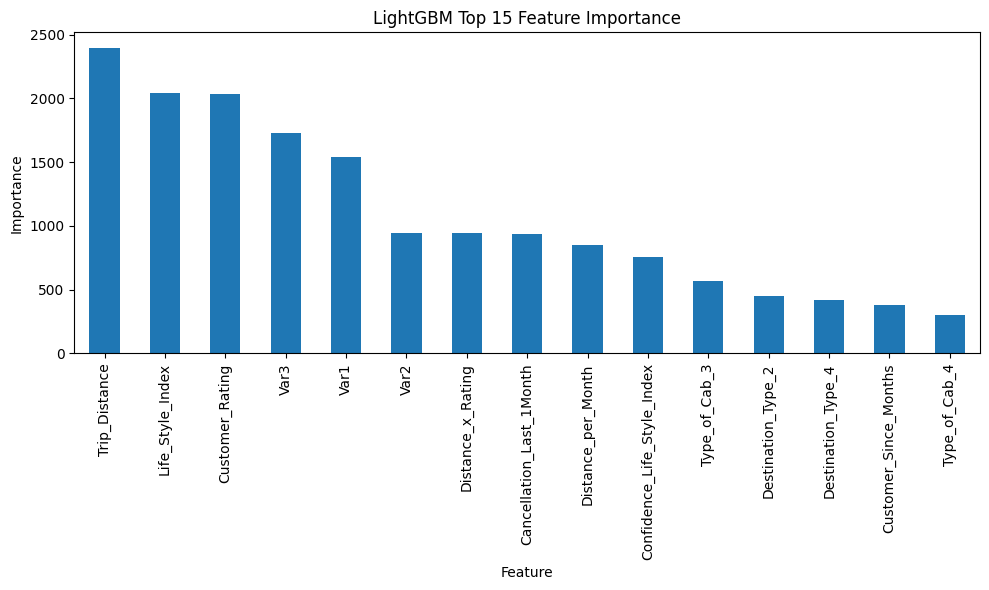

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
lgbm_feat_imp = pd.Series(best_lgbm.feature_importances_, index=X.columns)
lgbm_feat_imp.sort_values(ascending=False).head(15).plot(kind='bar')
plt.title("LightGBM Top 15 Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

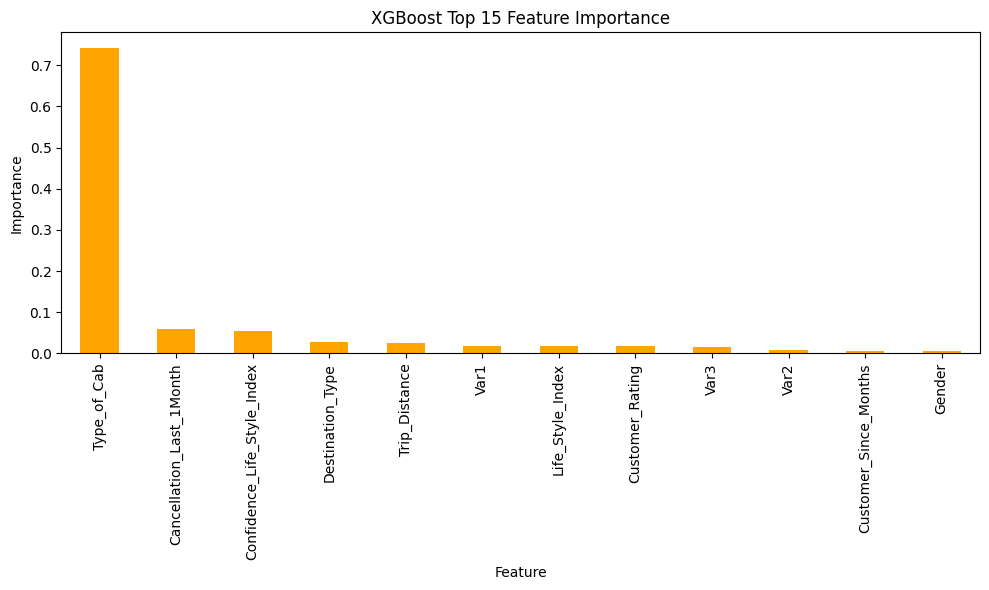

In [140]:
importances = best_xgb.feature_importances_
features = Xgb.columns if hasattr(Xgb, 'columns') else [f"feat_{i}" for i in range(Xgb.shape[1])]

plt.figure(figsize=(10, 6))
(pd.Series(importances, index=features)
   .sort_values(ascending=False)
   .head(15)
   .plot(kind='bar', color='orange'))
plt.title("XGBoost Top 15 Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## Making Tabel for the Score

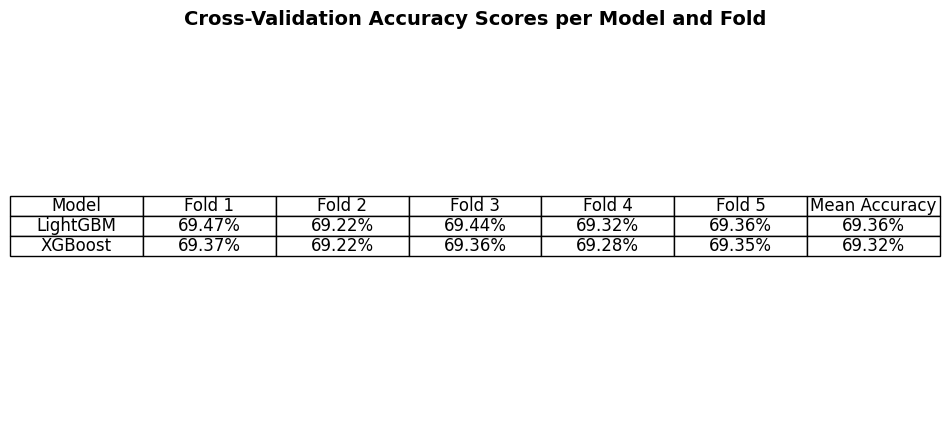

In [141]:
# Cross-validation results for LightGBM and XGBoost
cv_scores_lgbm = [0.6947, 0.6922, 0.6944, 0.6932, 0.6936]  # Example results from LightGBM
cv_scores_xgb = [0.6937, 0.6922, 0.6936, 0.6928, 0.6935]  # Example results from XGBoost

# Model names (LightGBM and XGBoost only)
models = ['LightGBM', 'XGBoost']

# Combine results into a DataFrame for LightGBM and XGBoost
cv_result = pd.DataFrame({
    'Model': models,
    'Fold 1': [cv_scores_lgbm[0], cv_scores_xgb[0]],
    'Fold 2': [cv_scores_lgbm[1], cv_scores_xgb[1]],
    'Fold 3': [cv_scores_lgbm[2], cv_scores_xgb[2]],
    'Fold 4': [cv_scores_lgbm[3], cv_scores_xgb[3]],
    'Fold 5': [cv_scores_lgbm[4], cv_scores_xgb[4]],
})

# Calculate mean accuracy for each model
cv_result['Mean Accuracy'] = cv_result[['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']].mean(axis=1)

# Format as percentage
cv_result_formatted = cv_result.copy()
for col in cv_result.columns[1:]:
    cv_result_formatted[col] = (cv_result_formatted[col] * 100).map('{:.2f}%'.format)

# Visualize the table using matplotlib
fig, ax = plt.subplots(figsize=(10, 5))  # Adjusting size for a cleaner look
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=cv_result_formatted.values,
                 colLabels=cv_result_formatted.columns,
                 cellLoc='center',
                 loc='center')

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Title of the table
plt.title('Cross-Validation Accuracy Scores per Model and Fold', fontsize=14, fontweight='bold')
plt.show()


# Interpretation Model

In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [146]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Create KFold object with 5 splits, shuffle=True ensures the data is shuffled, and random_state for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Prepare for Streamlit Deploy